In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score, precision_recall_curve, auc
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload the file manually
fifa = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')  # Use the correct filename

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


DATA PREPROCESSING

In [5]:
# Convert TotalCharges to numeric (it's loaded as object due to empty strings)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Handle missing values (very few rows have missing TotalCharges)
df.dropna(inplace=True)

# Drop customer ID as it's not useful for prediction
df.drop('customerID', axis=1, inplace=True)

# Convert Churn to binary (1 for Yes, 0 for No)
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Separate categorical and numerical columns
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col != 'Churn']

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Check class distribution
print("Churn Distribution:")
print(df['Churn'].value_counts(normalize=True))

# Split into features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Standardize numerical features
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nTraining set shape after SMOTE:", X_train_smote.shape)
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())

Churn Distribution:
Churn
0    0.734215
1    0.265785
Name: proportion, dtype: float64

Training set shape after SMOTE: (8260, 30)
Class distribution after SMOTE:
Churn
0    4130
1    4130
Name: count, dtype: int64


EXPLOATORY DATA ANALYSIS

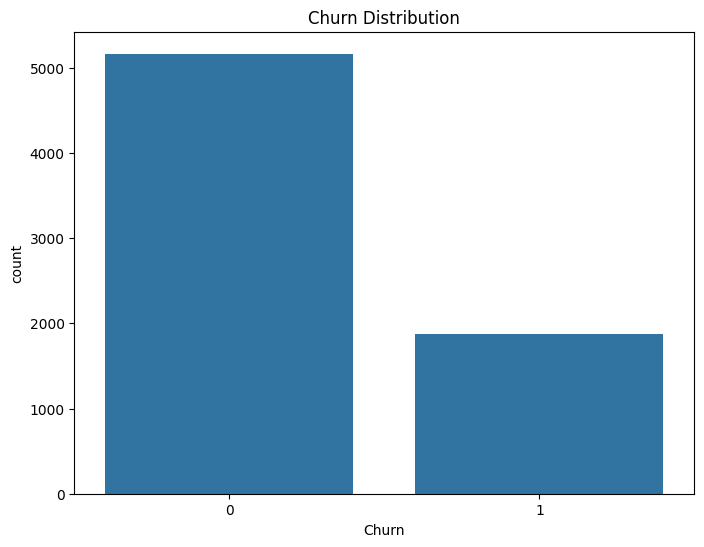

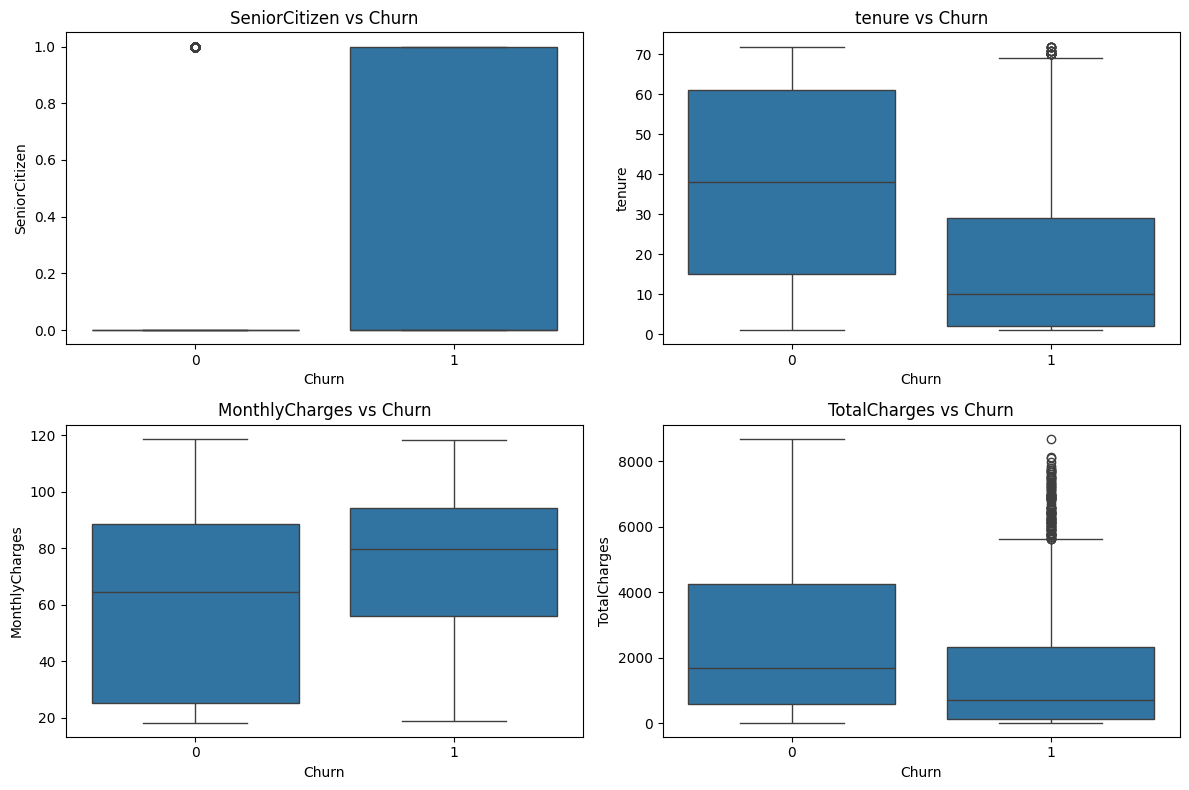

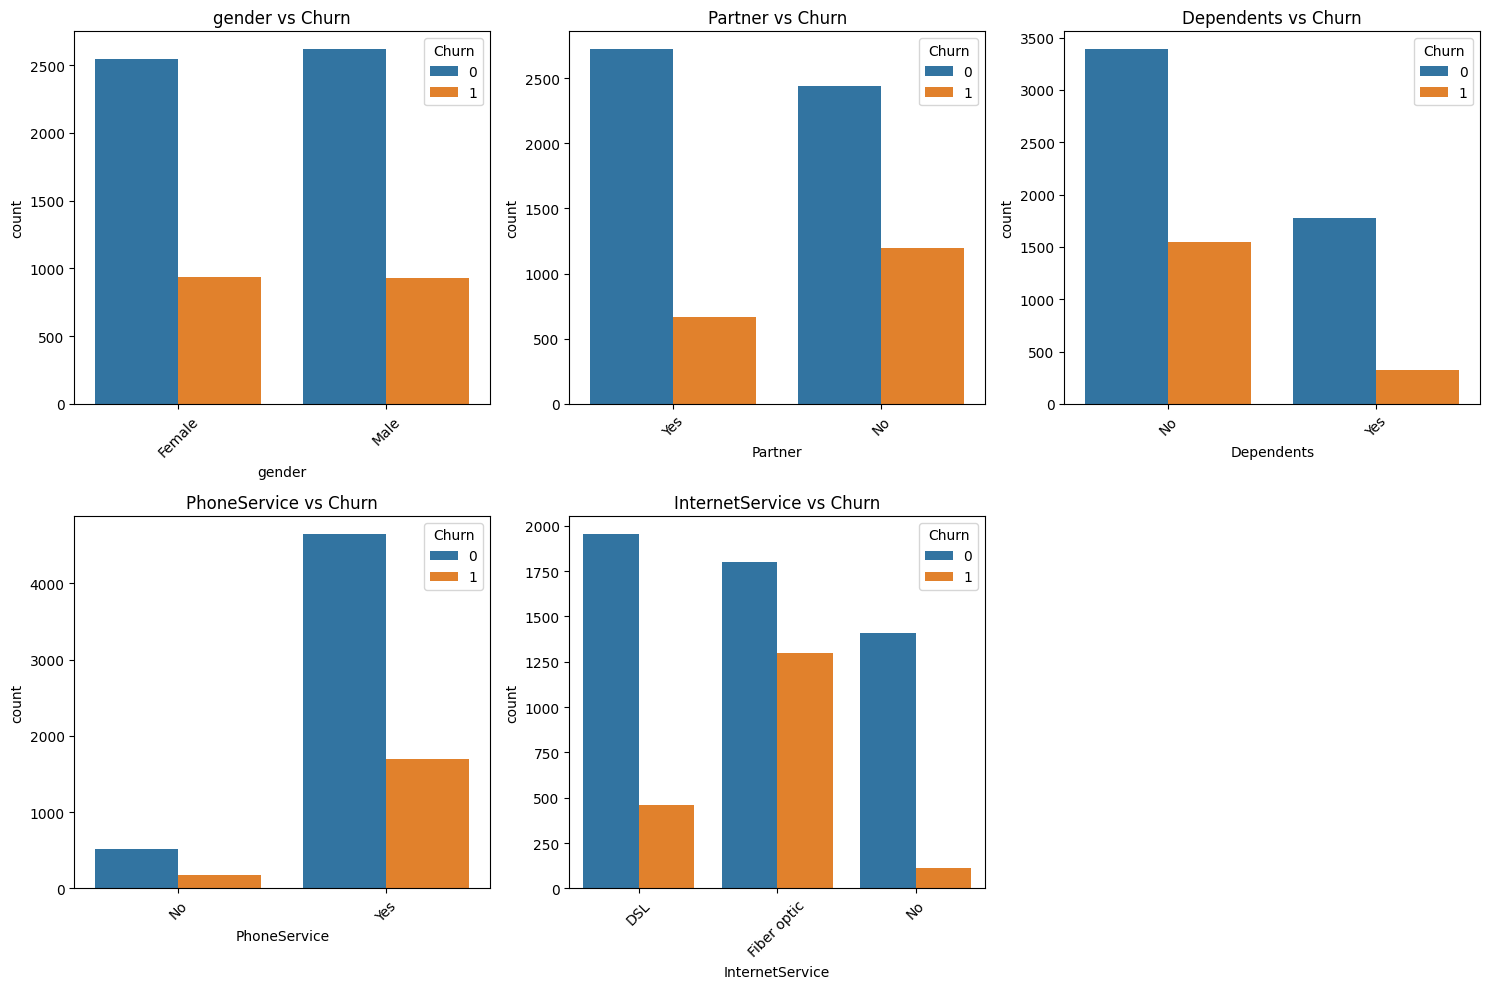

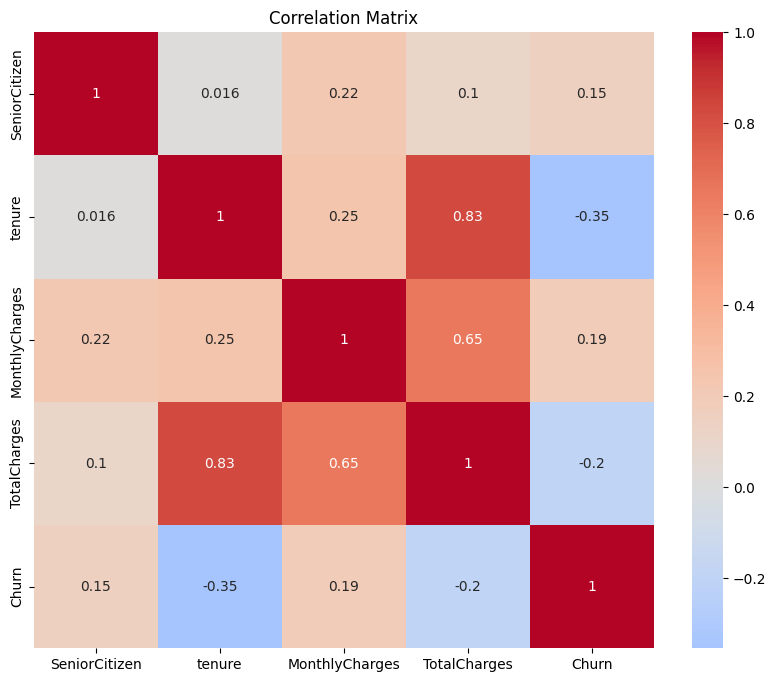

In [6]:
# Visualize churn distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Analyze numerical features
plt.figure(figsize=(12, 8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='Churn', y=col, data=df)
    plt.title(f'{col} vs Churn')
plt.tight_layout()
plt.show()

# Analyze categorical features (example for a few columns)
cat_to_plot = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cat_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=col, hue='Churn', data=df)
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[num_cols + ['Churn']].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()

MODEL BUILDING AND EVALUATION


Logistic Regression Performance:
Accuracy: 0.7427
ROC AUC: 0.8216
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      1033
           1       0.51      0.72      0.60       374

    accuracy                           0.74      1407
   macro avg       0.70      0.74      0.70      1407
weighted avg       0.78      0.74      0.75      1407



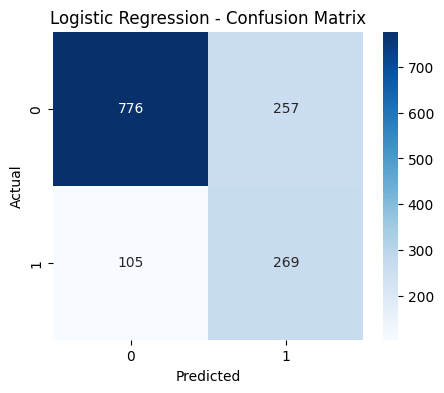


Random Forest Performance:
Accuracy: 0.7726
ROC AUC: 0.8131
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1033
           1       0.56      0.65      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.78      1407



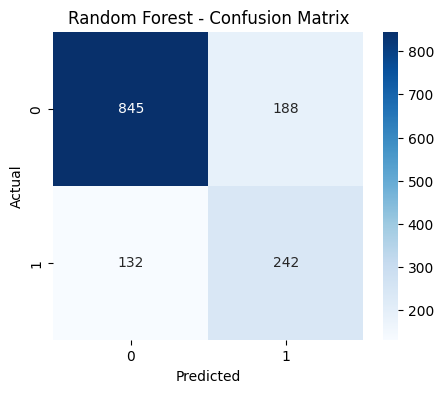


Gradient Boosting Performance:
Accuracy: 0.7569
ROC AUC: 0.8392
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82      1033
           1       0.53      0.77      0.63       374

    accuracy                           0.76      1407
   macro avg       0.71      0.76      0.72      1407
weighted avg       0.80      0.76      0.77      1407



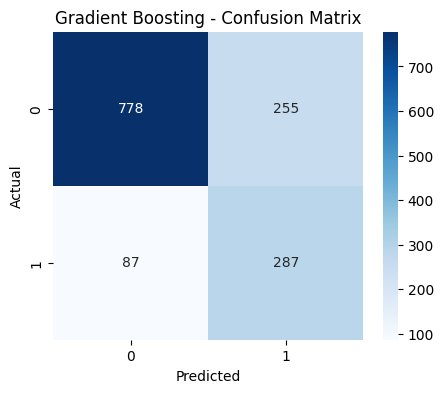


XGBoost Performance:
Accuracy: 0.7612
ROC AUC: 0.8098
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1033
           1       0.54      0.65      0.59       374

    accuracy                           0.76      1407
   macro avg       0.70      0.72      0.71      1407
weighted avg       0.78      0.76      0.77      1407



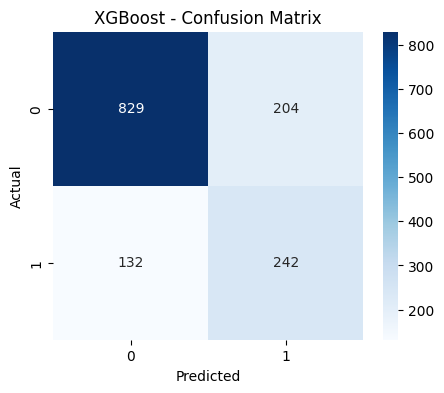


SVM Performance:
Accuracy: 0.7470
ROC AUC: 0.8089
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1033
           1       0.52      0.74      0.61       374

    accuracy                           0.75      1407
   macro avg       0.70      0.74      0.71      1407
weighted avg       0.79      0.75      0.76      1407



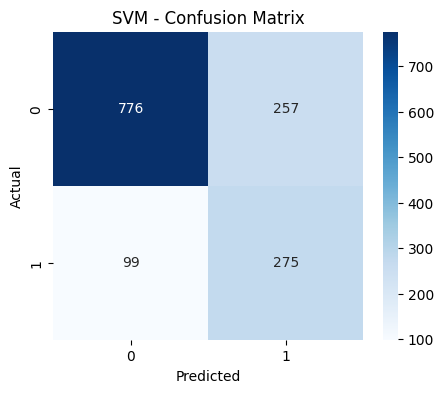

In [7]:
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42, eval_metric='logloss'),
    'SVM': SVC(probability=True, random_state=42)
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Store results
    results[name] = {
        'Accuracy': accuracy_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_prob),
        'Classification Report': classification_report(y_test, y_pred),
        'Confusion Matrix': confusion_matrix(y_test, y_pred)
    }

    # Print results
    print(f"\n{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

HYPERPARAMETER TUNING

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Tuned Random Forest Performance:
Accuracy: 0.7683
ROC AUC: 0.8149
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1033
           1       0.56      0.64      0.60       374

    accuracy                           0.77      1407
   macro avg       0.71      0.73      0.72      1407
weighted avg       0.78      0.77      0.77      1407



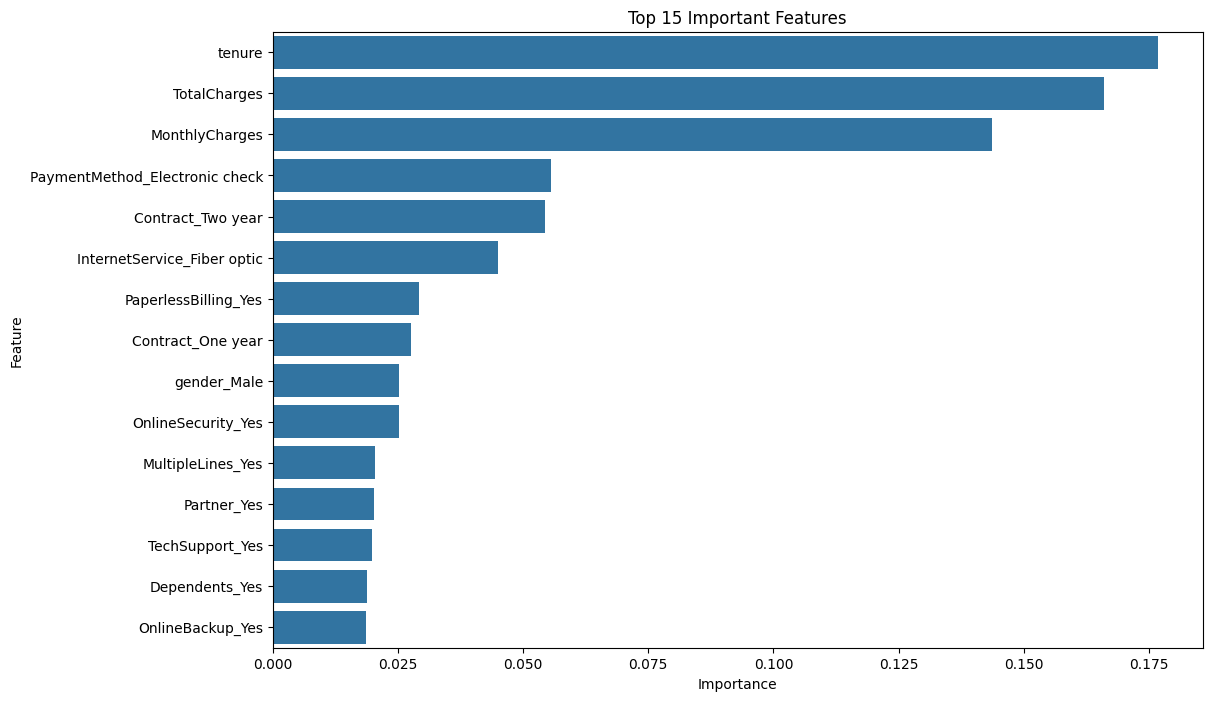

In [8]:
# Hyperparameter tuning for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                          cv=5, n_jobs=-1, scoring='roc_auc')
grid_search.fit(X_train_smote, y_train_smote)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Evaluate best model
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
y_prob = best_rf.predict_proba(X_test)[:, 1]

print("\nTuned Random Forest Performance:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_prob):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features')
plt.show()

In [9]:
# Based on evaluation, select the best model (here we choose XGBoost)
final_model = XGBClassifier(random_state=42, eval_metric='logloss')
final_model.fit(X_train_smote, y_train_smote)

# Save the model for deployment
import joblib
joblib.dump(final_model, 'churn_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

# Save the column names for reference during deployment
with open('model_columns.pkl', 'wb') as f:
    joblib.dump(list(X.columns), f)

print("Model and preprocessing artifacts saved successfully!")

Model and preprocessing artifacts saved successfully!


In [10]:
def predict_churn(customer_data):
    """
    Function to predict churn for new customer data
    customer_data: Dictionary containing customer features
    """
    # Load artifacts
    model = joblib.load('churn_prediction_model.pkl')
    scaler = joblib.load('scaler.pkl')
    with open('model_columns.pkl', 'rb') as f:
        model_columns = joblib.load(f)

    # Convert input data to DataFrame
    input_df = pd.DataFrame([customer_data])

    # Preprocess the data (same steps as training)
    input_df['TotalCharges'] = pd.to_numeric(input_df['TotalCharges'], errors='coerce')

    # One-hot encode categorical variables
    input_encoded = pd.get_dummies(input_df)

    # Ensure all columns from training are present
    for col in model_columns:
        if col not in input_encoded.columns:
            input_encoded[col] = 0

    # Reorder columns to match training
    input_encoded = input_encoded[model_columns]

    # Scale numerical features
    input_encoded[num_cols] = scaler.transform(input_encoded[num_cols])

    # Make prediction
    churn_prob = model.predict_proba(input_encoded)[0, 1]
    churn_pred = int(churn_prob > 0.5)  # Using 0.5 as threshold

    return {
        'churn_prediction': churn_pred,
        'churn_probability': float(churn_prob),
        'churn_risk': 'High' if churn_pred == 1 else 'Low'
    }

# Example usage:
# sample_customer = {
#     'gender': 'Male',
#     'SeniorCitizen': 0,
#     'Partner': 'Yes',
#     'Dependents': 'No',
#     'tenure': 12,
#     'PhoneService': 'Yes',
#     'MultipleLines': 'No',
#     'InternetService': 'DSL',
#     'OnlineSecurity': 'No',
#     'OnlineBackup': 'Yes',
#     'DeviceProtection': 'No',
#     'TechSupport': 'No',
#     'StreamingTV': 'No',
#     'StreamingMovies': 'No',
#     'Contract': 'Month-to-month',
#     'PaperlessBilling': 'Yes',
#     'PaymentMethod': 'Electronic check',
#     'MonthlyCharges': 29.85,
#     'TotalCharges': 29.85 * 12
# }
# print(predict_churn(sample_customer))

INTERPRET RESULTS


Best performing model: Gradient Boosting with ROC AUC: 0.8392


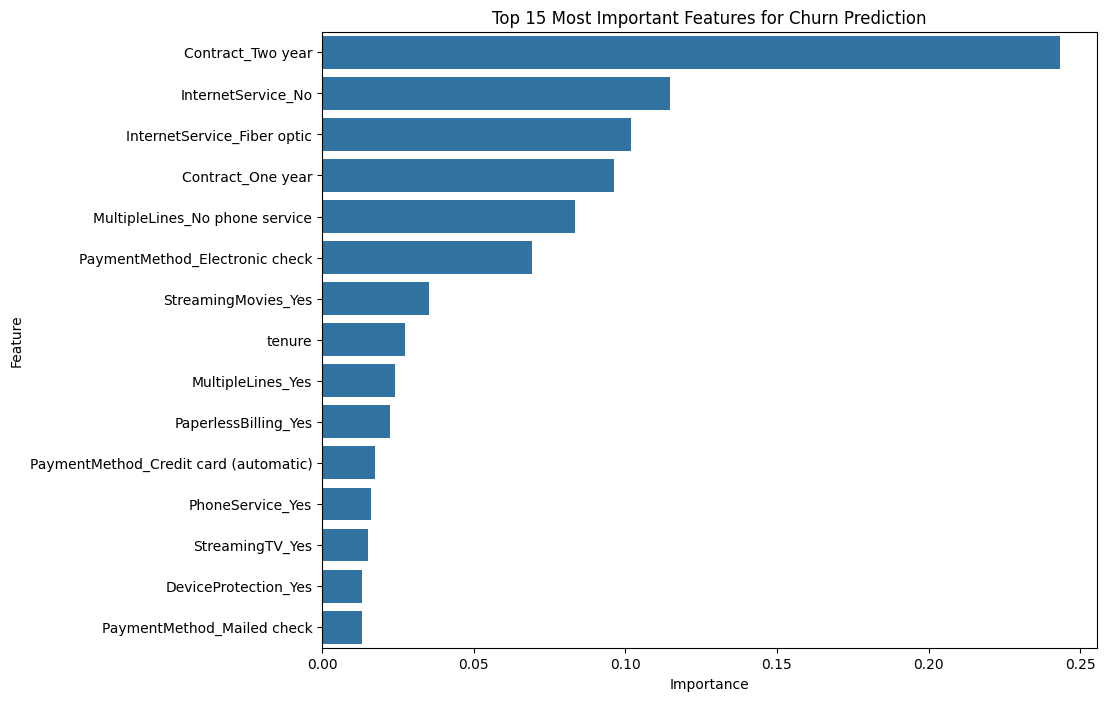

In [11]:
# Check which model performed best
best_model = max(results, key=lambda x: results[x]['ROC AUC'])
print(f"\nBest performing model: {best_model} with ROC AUC: {results[best_model]['ROC AUC']:.4f}")

# Analyze feature importance from your best model
if hasattr(final_model, 'feature_importances_'):
    feature_imp = pd.DataFrame({
        'Feature': X.columns,
        'Importance': final_model.feature_importances_
    }).sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_imp.head(15))
    plt.title('Top 15 Most Important Features for Churn Prediction')
    plt.show()

ADVANCED TECHNIQUES

In [13]:
# Try deep learning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_smote.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train_smote, y_train_smote, epochs=50, batch_size=32,
          validation_data=(X_test, y_test))

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


259/259 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7230 - loss: 0.5546 - val_accuracy: 0.7413 - val_loss: 0.4936
Epoch 2/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7801 - loss: 0.4686 - val_accuracy: 0.7576 - val_loss: 0.4859
Epoch 3/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7814 - loss: 0.4641 - val_accuracy: 0.7498 - val_loss: 0.4833
Epoch 4/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7934 - loss: 0.4542 - val_accuracy: 0.7377 - val_loss: 0.5084
Epoch 5/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7792 - loss: 0.4596 - val_accuracy: 0.7171 - val_loss: 0.5445
Epoch 6/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7882 - loss: 0.4510 - val_accuracy: 0.7385 - val_loss: 0.5115
Epoch 7/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7946 - loss: 0.4397 - val_accuracy: 0.7342 - val_loss: 0.5154
Epoch 8/50
259/259 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7931 - loss: 0.4445 - val_accuracy: 0.7640 - val

CUSTOMER LIFETIME VALUE INTEGRATION

In [15]:
# Combine churn probability with CLV
df['CLV'] = df['MonthlyCharges'] * df['tenure']  # Simple CLV calculation
df['churn_prob'] = final_model.predict_proba(X)[:, 1]
df['risk_score'] = df['churn_prob'] * df['CLV']

# Identify high-value at-risk customers
high_risk_high_value = df[(df['churn_prob'] > 0.7) & (df['CLV'] > df['CLV'].quantile(0.75))]

A/B testing framework

In [16]:
# Design experiment for retention strategies
retention_offers = {
    'discount': 0.1,  # 10% discount
    'free_service': 'Premium channels for 3 months',
    'loyalty': 'Upgrade to loyalty program'
}

# Implement tracking for different interventions

In [19]:
# Preprocess a single customer's data (example)
new_customer = {
    'tenure': 12,
    'MonthlyCharges': 29.85,
    'TotalCharges': 358.2,
    'gender_Male': 1,
    'Partner_Yes': 0,
    # ... include all other features exactly as your model expects
}

# Convert to DataFrame and preprocess (same as training)
import pandas as pd
new_df = pd.DataFrame([new_customer])

# Ensure all columns match training data
with open('model_columns.pkl', 'rb') as f:
    model_columns = joblib.load(f)
for col in model_columns:
    if col not in new_df.columns:
        new_df[col] = 0
new_df = new_df[model_columns]

# Scale numerical features (if you scaled during training)
new_df[num_cols] = scaler.transform(new_df[num_cols])

# Predict
churn_prob = model.predict(new_df)[0][0]  # Returns probability
churn_pred = 1 if churn_prob > 0.5 else 0  # Convert to binary

print(f"Churn Probability: {churn_prob:.4f}")
print(f"Prediction: {'Churn' if churn_pred == 1 else 'No Churn'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Churn Probability: 0.9996
Prediction: Churn


In [23]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# 1. Load ALL required artifacts
try:
    scaler = joblib.load('scaler.pkl')
    model = joblib.load('churn_prediction_model.pkl')  # Add this line to load model
    with open('model_columns.pkl', 'rb') as f:
        model_columns = joblib.load(f)
    print("Artifacts loaded successfully!")
except Exception as e:
    print(f"Error loading artifacts: {e}")
    exit()

# 2. Print expected features for debugging
print("\nFirst 10 expected features:", model_columns[:10])
print("Total features expected:", len(model_columns))

# 3. Create test customer - CORRECTED 'TotalCharges' typo
test_customer = {
    'tenure': 12,
    'MonthlyCharges': 29.85,
    'TotalCharges': 358.20,  # Fixed typo (must match your actual column name)

    # Categorical features
    'gender_Male': 1,
    'Partner_Yes': 0,
    'Dependents_Yes': 0,
    'PhoneService_Yes': 1,
    'MultipleLines_No phone service': 0,
    'MultipleLines_Yes': 0,
    'InternetService_DSL': 0,
    'InternetService_Fiber optic': 0,
    'InternetService_No': 1,
    'OnlineSecurity_No internet service': 0,
    'OnlineSecurity_Yes': 0
    # ... add ALL other features from model_columns
}

# 4. Convert to DataFrame and fill missing features
test_df = pd.DataFrame([test_customer])

# Add missing columns with 0 values
missing_cols = set(model_columns) - set(test_df.columns)
for col in missing_cols:
    test_df[col] = 0

# 5. Reorder columns EXACTLY as in training
test_df = test_df[model_columns]

# 6. Verify numerical columns - THESE MUST MATCH YOUR TRAINING
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']  # Check if these match your scaler
try:
    test_df[num_cols] = scaler.transform(test_df[num_cols])
except Exception as e:
    print(f"\nScaling error: {e}")
    print("Check your numerical columns:")
    print("Expected by scaler:", scaler.feature_names_in_)
    print("You provided:", num_cols)
    exit()

# 7. Make prediction
try:
    prob = model.predict_proba(test_df)[0][1]  # Changed to predict_proba for sklearn models
    pred = 1 if prob > 0.5 else 0

    print("\n=== Successful Prediction ===")
    print(f"Churn Probability: {prob:.4f}")
    print(f"Prediction: {'CHURN' if pred == 1 else 'NO CHURN'}")
    print("\nTop 5 features influencing this prediction:")

    # For interpretability (if using tree-based model)
    if hasattr(model, 'feature_importances_'):
        print(pd.DataFrame({
            'Feature': model_columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False).head(5))

except Exception as e:
    print(f"\nPrediction failed: {str(e)}")
    print("Common solutions:")
    print("1. Check ALL feature names match exactly")
    print("2. Verify numerical columns match scaler expectations")
    print("3. Ensure model is properly loaded")
    print("4. Compare with training data columns:", model_columns)

Artifacts loaded successfully!

First 10 expected features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes', 'MultipleLines_No phone service', 'MultipleLines_Yes']
Total features expected: 30

Scaling error: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- SeniorCitizen

Check your numerical columns:
Expected by scaler: ['SeniorCitizen' 'tenure' 'MonthlyCharges' 'TotalCharges']
You provided: ['tenure', 'MonthlyCharges', 'TotalCharges']

=== Successful Prediction ===
Churn Probability: 0.0008
Prediction: NO CHURN

Top 5 features influencing this prediction:
                           Feature  Importance
25               Contract_Two year    0.243374
11              InternetService_No    0.114657
10     InternetService_Fiber optic    0.101870
24               Contract_One year    0.096436
8   MultipleLines_No phone service    0.083448
